In [1]:
import torch
from sbi import utils as utils
from sbi import analysis as analysis
from sbi.inference.base import infer

import hnn_core
import os.path as opx
import matplotlib.pyplot as plt
import time
import numpy as np
from hnn_core import jones_2009_model, simulate_dipole, read_params
from hnn_core.network_models import add_erp_drives_to_jones_model
from sbi.inference import SNPE, prepare_for_sbi, simulate_for_sbi

--No graphics will be displayed.


In [2]:
def hnn_simulator(parameter_set):
    
    net_sim = jones_2009_model()
    
    parameter_set0 = float(parameter_set[0])
    parameter_set1 = float(parameter_set[1])
    parameter_set2 = float(parameter_set[2])
    
    
    # add a distal evoked drive
    weights_ampa_d1 = {'L2_basket': 0.006562, 'L2_pyramidal': .000007,
                       'L5_pyramidal': parameter_set0}
    weights_nmda_d1 = {'L2_basket': 0.019482, 'L2_pyramidal': 0.004317,
                       'L5_pyramidal': 0.080074}
    synaptic_delays_d1 = {'L2_basket': 0.1, 'L2_pyramidal': 0.1,
                          'L5_pyramidal': 0.1}
    net_sim.add_evoked_drive(
        'evdist1', mu=63.53, sigma=3.85, numspikes=1, weights_ampa=weights_ampa_d1,
        weights_nmda=weights_nmda_d1, location='distal',
        synaptic_delays=synaptic_delays_d1, event_seed=274)
    
    
    # add two proximal drives
    weights_ampa_p1 = {'L2_basket': 0.08831, 'L2_pyramidal': 0.01525,
                       'L5_basket': 0.19934, 'L5_pyramidal': parameter_set1}
    synaptic_delays_prox = {'L2_basket': 0.1, 'L2_pyramidal': 0.1,
                            'L5_basket': 1., 'L5_pyramidal': 1.}
    # all NMDA weights are zero; pass None explicitly
    net_sim.add_evoked_drive(
        'evprox1', mu=26.61, sigma=2.47, numspikes=1, weights_ampa=weights_ampa_p1,
        weights_nmda=None, location='proximal',
        synaptic_delays=synaptic_delays_prox, event_seed=544)

    # Second proximal evoked drive. NB: only AMPA weights differ from first
    weights_ampa_p2 = {'L2_basket': 0.000003, 'L2_pyramidal': 1.438840,
                       'L5_basket': 0.008958, 'L5_pyramidal': parameter_set2}
    # all NMDA weights are zero; omit weights_nmda (defaults to None)
    net_sim.add_evoked_drive(
        'evprox2', mu=137.12, sigma=8.33, numspikes=1,
        weights_ampa=weights_ampa_p2, location='proximal',
        synaptic_delays=synaptic_delays_prox, event_seed=814)

    dpl = simulate_dipole(net_sim, dt=0.5, tstop=170)

    return dpl[0].copy().smooth(30).scale(3000).data['agg']

In [3]:
prior = utils.BoxUniform(low=[0, 0, 0], high=[1, 1, 1])

In [23]:
simulator, prior = prepare_for_sbi(hnn_simulator, prior)
inference = SNPE(prior)

theta, x = simulate_for_sbi(simulator, proposal=prior, num_simulations=1000, num_workers=8)

Joblib will run 1 trial(s) in parallel by distributing trials over 1 jobs.
Building the NEURON model
[Done]
Trial 1: 0.5 ms...
Trial 1: 10.0 ms...
Trial 1: 20.0 ms...
Trial 1: 30.0 ms...
Trial 1: 40.0 ms...
Trial 1: 50.0 ms...
Trial 1: 60.0 ms...
Trial 1: 70.0 ms...
Trial 1: 80.0 ms...
Trial 1: 90.0 ms...
Trial 1: 100.0 ms...
Trial 1: 110.0 ms...
Trial 1: 120.0 ms...
Trial 1: 130.0 ms...
Trial 1: 140.0 ms...
Trial 1: 150.0 ms...
Trial 1: 160.0 ms...


Running 1000 simulations in 1000 batches.:   0%|          | 0/1000 [00:00<?, ?it/s]

--No graphics will be displayed.
--No graphics will be displayed.
--No graphics will be displayed.
--No graphics will be displayed.
--No graphics will be displayed.
--No graphics will be displayed.
--No graphics will be displayed.
--No graphics will be displayed.


Joblib will run 1 trial(s) in parallel by distributing trials over 1 jobs.
Loading custom mechanism files from /Users/tianqicheng/opt/anaconda3/envs/2060/lib/python3.10/site-packages/hnn_core/mod/arm64/.libs/libnrnmech.so
Building the NEURON model
[Done]
Trial 1: 0.5 ms...
Trial 1: 10.0 ms...
Trial 1: 20.0 ms...
Trial 1: 30.0 ms...
Trial 1: 40.0 ms...
Trial 1: 50.0 ms...
Trial 1: 60.0 ms...
Trial 1: 70.0 ms...
Trial 1: 80.0 ms...
Trial 1: 90.0 ms...
Trial 1: 100.0 ms...
Trial 1: 110.0 ms...
Trial 1: 120.0 ms...
Trial 1: 130.0 ms...
Trial 1: 140.0 ms...
Trial 1: 150.0 ms...
Trial 1: 160.0 ms...
Joblib will run 1 trial(s) in parallel by distributing trials over 1 jobs.
Building the NEURON model
[Done]
Trial 1: 0.5 ms...
Trial 1: 10.0 ms...
Trial 1: 20.0 ms...
Trial 1: 30.0 ms...
Trial 1: 40.0 ms...
Trial 1: 50.0 ms...
Trial 1: 60.0 ms...
Trial 1: 70.0 ms...
Trial 1: 80.0 ms...
Trial 1: 90.0 ms...
Trial 1: 100.0 ms...
Trial 1: 110.0 ms...
Trial 1: 120.0 ms...
Trial 1: 130.0 ms...
Trial 1:

In [24]:
# save x, theta
# torch.save(x, 'data1000_3ERPDrives_smooth_scale/x.pt')
# torch.save(theta, 'data1000_3ERPDrives_smooth_scale/theta.pt')

In [11]:
# load x, theta
x = torch.load('data1000_3ERPDrives_smooth_scale/x.pt')
theta = torch.load('data1000_3ERPDrives_smooth_scale/theta.pt')

In [12]:
x.shape

torch.Size([1000, 341])

In [13]:
theta.shape

torch.Size([1000, 3])

In [14]:
x

tensor([[-0.1558, -0.1754, -0.1949,  ..., 22.3590, 20.8787, 19.4465],
        [-0.1558, -0.1754, -0.1949,  ..., 14.7764, 13.5038, 12.3067],
        [-0.1558, -0.1754, -0.1949,  ...,  4.2634,  3.2054,  2.2707],
        ...,
        [-0.1558, -0.1754, -0.1949,  ..., 14.5994, 13.4982, 12.4390],
        [-0.1558, -0.1754, -0.1949,  ..., 16.6773, 15.7138, 14.7846],
        [-0.1558, -0.1754, -0.1949,  ..., 11.7446, 10.7863,  9.9005]])

In [15]:
theta

tensor([[0.9906, 0.2885, 0.8750],
        [0.5059, 0.2366, 0.7570],
        [0.2346, 0.6471, 0.3556],
        ...,
        [0.9182, 0.8418, 0.1603],
        [0.5370, 0.2061, 0.3992],
        [0.0566, 0.4668, 0.2724]])

In [28]:
avg_x = torch.mean(x, axis=0)
avg_x.shape

torch.Size([341])

In [32]:
yes_data = torch.load('Real_ERP_data/np_yes_data.pt')
yes_data.shape

(341,)

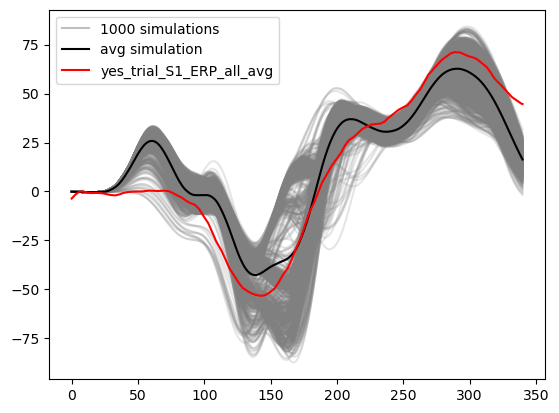

In [39]:
plt.plot(x.T, color='gray', alpha=0.2)
plt.plot([], color='gray', alpha=0.5, label='1000 simulations')  #just for legend setting purpose
plt.plot(avg_x.T, color='black', label="avg simulation")
plt.plot(yes_data.T, color='red', label="yes_trial_S1_ERP_all_avg")
plt.legend()
plt.show()